In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [243]:
df = pd.read_csv('Churn_Modelling.csv')

In [100]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [102]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [103]:
df.Exited.describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

In [104]:
df.Exited.unique()

array([1, 0], dtype=int64)

In [105]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [106]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

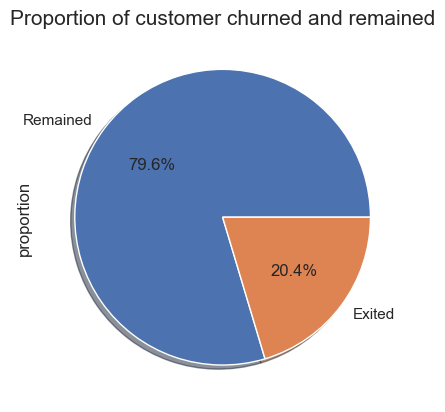

In [222]:
aux1 = df['Exited'].value_counts(normalize=True)

labels =  'Remained','Exited'
aux1.plot(kind='pie', autopct='%1.1f%%', labels = labels,shadow=True)
plt.title('Distribution of Exited')
plt.title("Proportion of customer churned and remained", size = 15)

plt.show()

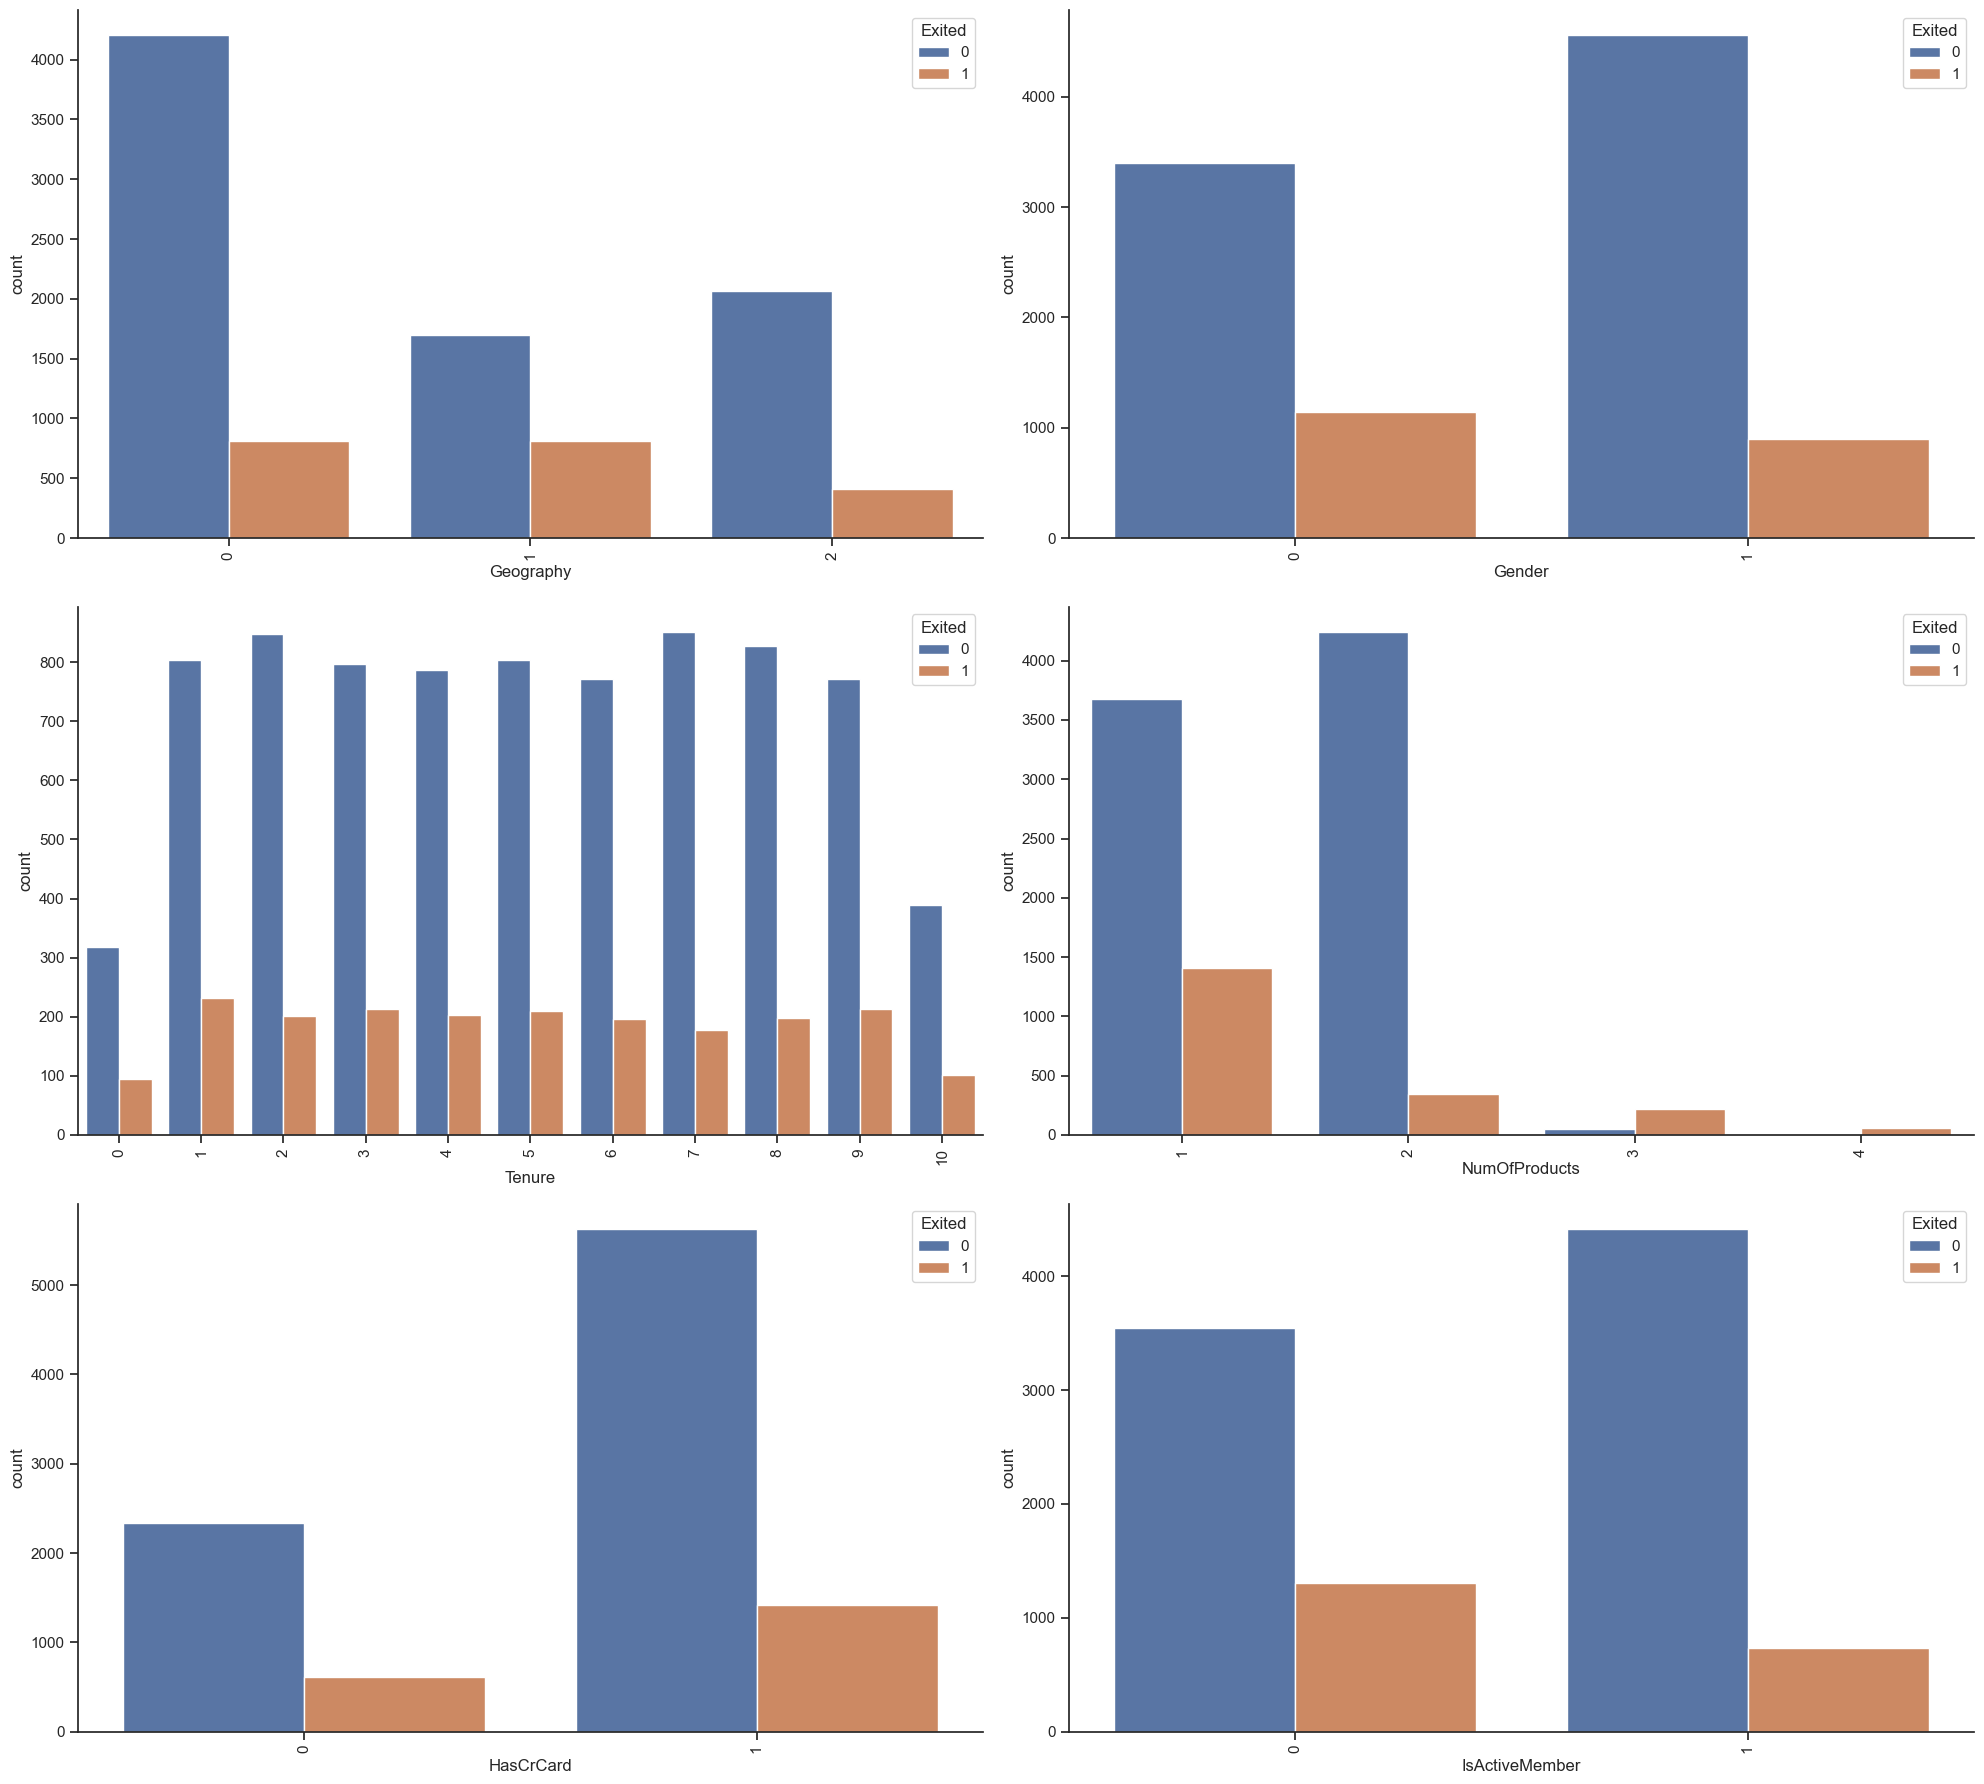

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))  # Adjust grid size and figure size
axs = axs.ravel()  # Flatten the axes array

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, hue='Exited', ax=axs[i])  # Add hue argument to separate based on 'Exited'
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90);  # Rotate x-axis labels

plt.tight_layout()  # Ensure subplots do not overlap


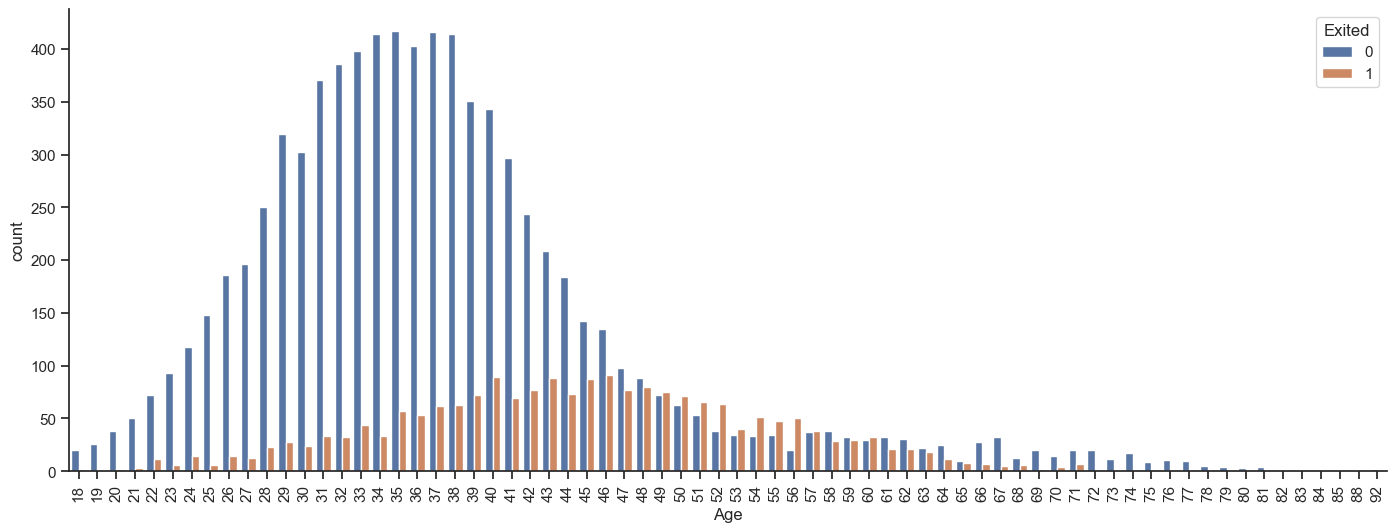

In [308]:
plt.figure(figsize=(17,6))
sns.countplot(data=df, x='Age', hue='Exited')
plt.xticks(rotation= 90);

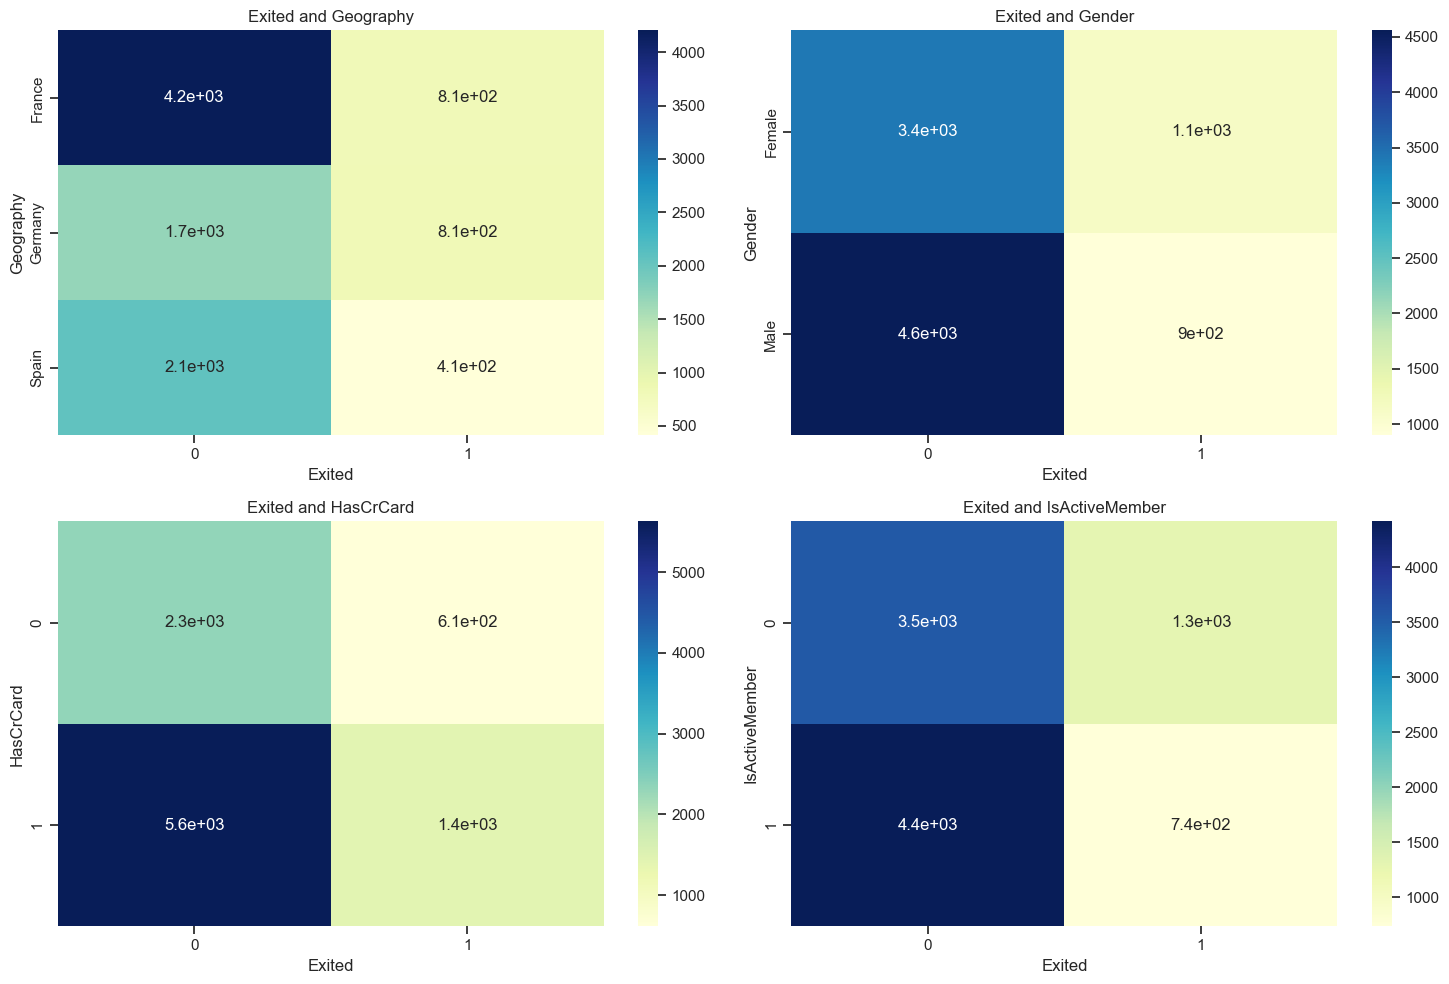

In [179]:
# Assuming that `df` is your DataFrame.
columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Adjust grid size and figure size
axs = axs.ravel()  # Flatten the axes array

for i, column in enumerate(columns):
    cross_tab = pd.crosstab(df[column], df['Exited'])  # Assuming 'Exited' is your target variable
    sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", ax=axs[i])
    axs[i].set_title(f'Exited and {column}')

plt.tight_layout()  # Ensure subplots do not overlap
plt.show()



In [186]:
aux1 = df.groupby('IsActiveMember')['Exited'].value_counts('normalize')*100
aux1

IsActiveMember  Exited
0               0         73.149103
                1         26.850897
1               0         85.730926
                1         14.269074
Name: proportion, dtype: float64

About 14% the clients that was active member exited, and about 27% the not active member exited.

In [246]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Select object columns
object_cols = df.select_dtypes(include='object').columns

# Apply LabelEncoder to each column
for col in object_cols:
    df[col] = le.fit_transform(df[col])

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int32  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int32  
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(3), int64(9)
memory usage: 976.7 KB


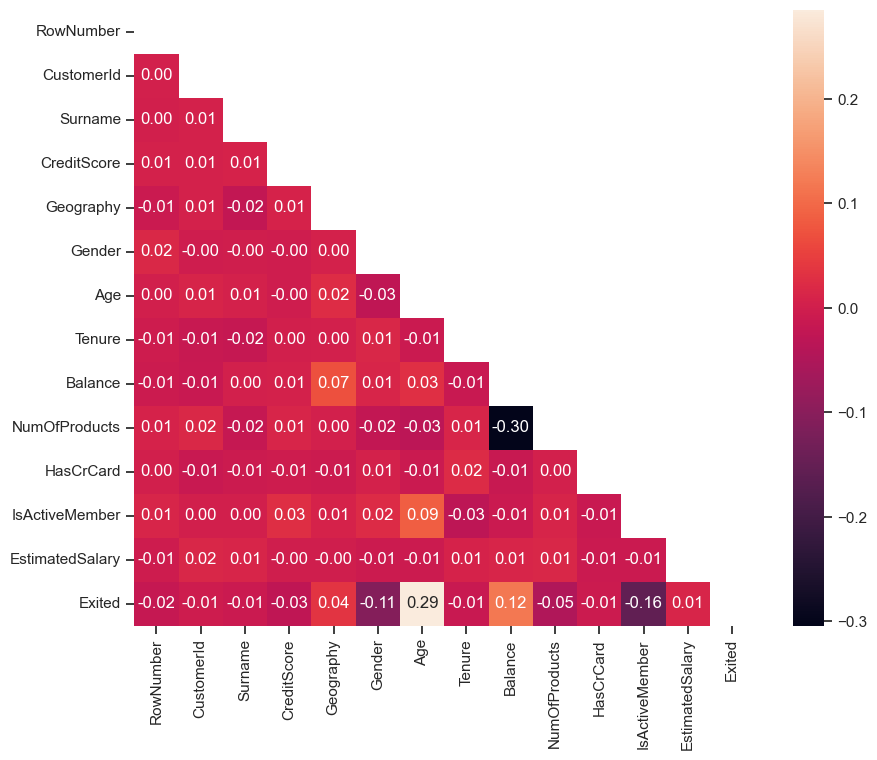

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()
plt.figure(figsize = (10,8))

# Create a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask)

# Show the plot
plt.show()




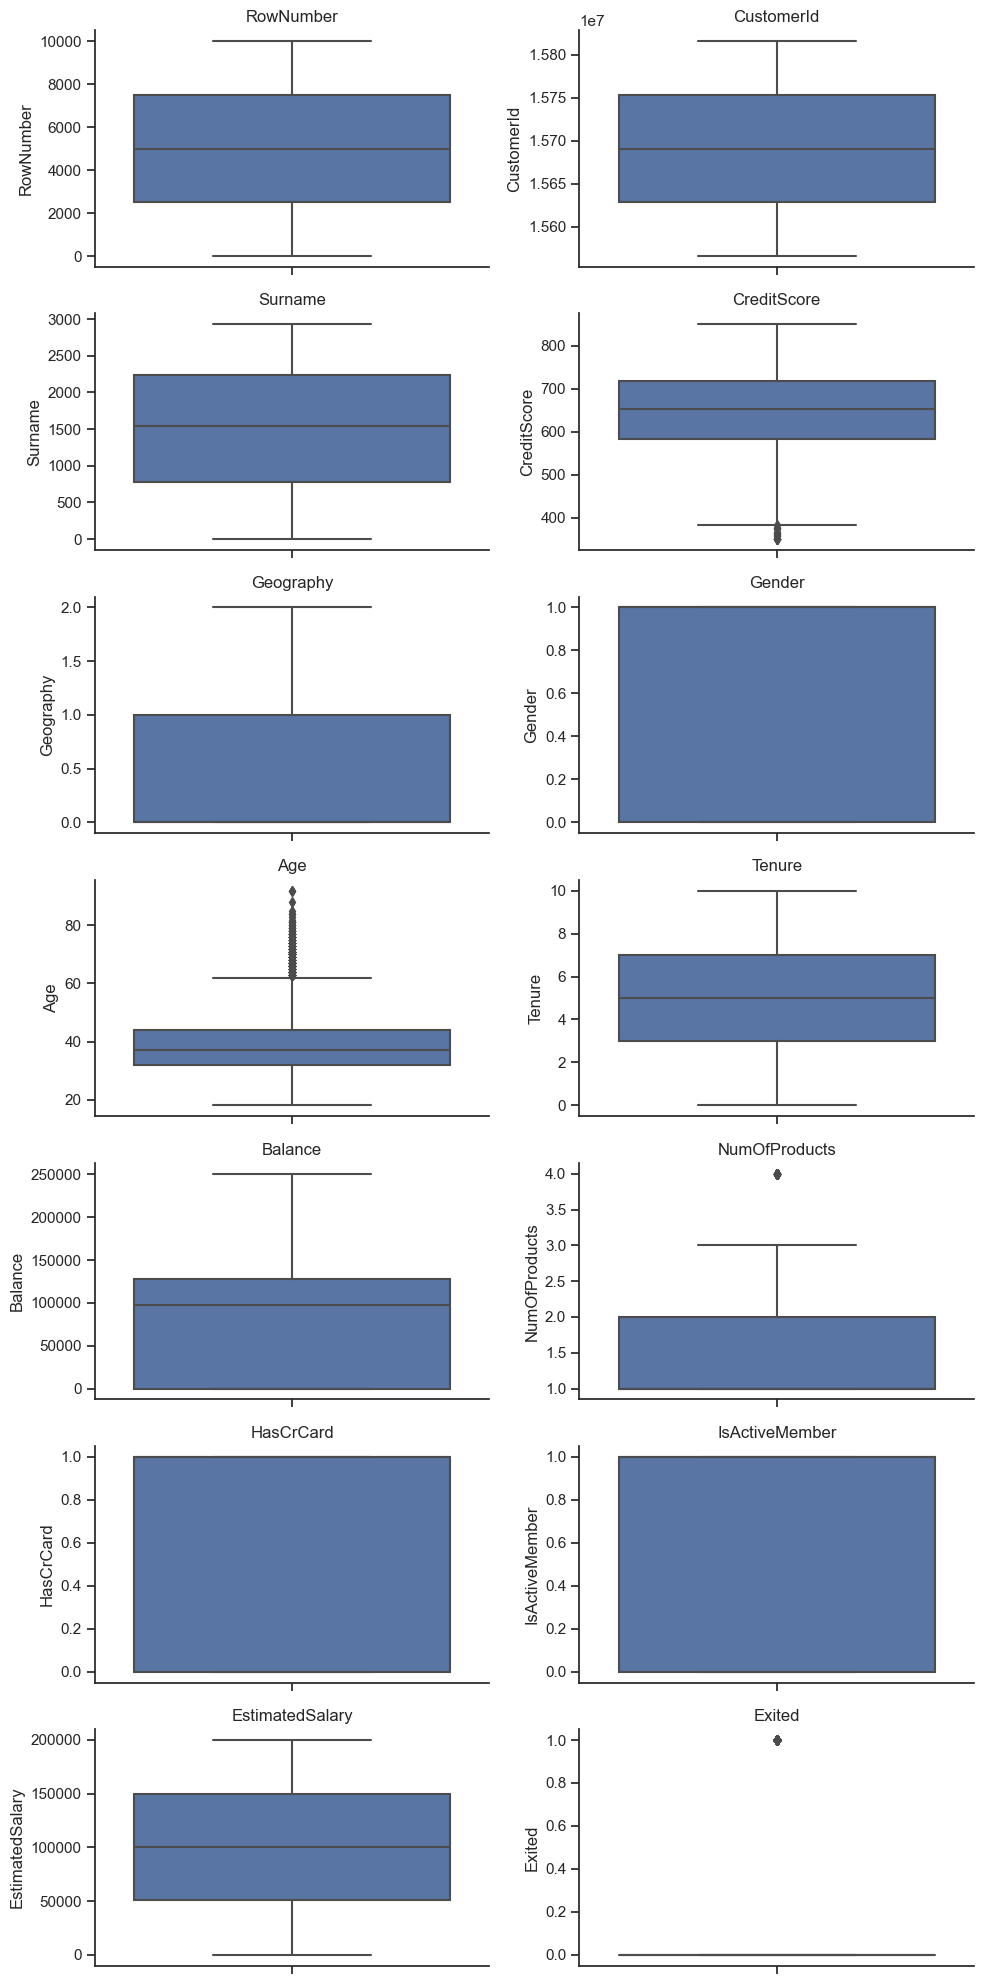

In [293]:
fig, axs = plt.subplots(7, 2, figsize=(10, 20))  # Adjust grid size (7,2) and figure size (10,20) as needed

axs = axs.flatten()  # Flattens the grid to a 1D array for easier iteration

for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axs[i])  # Creates a box plot on the i-th subplot
    axs[i].set_title(column)  # Sets the title of the i-th subplot to the column name

plt.tight_layout()  # Ensures a nice layout
plt.show()